# Visualization for proposal video

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

##  Clean Vehicle Data

In [2]:
def build_loc_vehicle(state):
    state = state.lower()
    return 'data/vehicles/vehicles_' + state + '.csv'

In [3]:
loc = build_loc_vehicle('ca')

In [4]:
data_ca = pd.read_csv(loc)

/Users/samaygarg/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data_ca.head()

,Vehicle ID,County GEOID,Registration Valid Date,DMV ID,DMV Snapshot,Registration Expiration Date,State Abbreviation,Geography,Vehicle Name
0,CA-002-03597\r,06099,2011-01-01,2,CA Registration Data from CA (12/31/2011),NaN,CA,County,Chevrolet Volt
1,CA-002-03598\r,06105,2011-01-01,2,CA Registration Data from CA (12/31/2011),NaN,CA,County,Nissan Leaf
2,CA-002-03599\r,06103,2011-01-01,2,CA Registration Data from CA (12/31/2011),NaN,CA,County,Chevrolet Volt
3,CA-002-03600\r,06099,2011-01-01,2,CA Registration Data from CA (12/31/2011),NaN,CA,County,Tesla Roadster
4,CA-002-03601\r,06099,2011-01-01,2,CA Registration Data from CA (12/31/2011),NaN,CA,County,Tesla Roadster


In [6]:
data_small = data_ca[['County GEOID', 'Registration Valid Date', 'Vehicle Name']]
data_small.columns = ['geoid', 'registration', 'vehicle']
data_small.head()

,geoid,registration,vehicle
0,06099,2011-01-01,Chevrolet Volt
1,06105,2011-01-01,Nissan Leaf
2,06103,2011-01-01,Chevrolet Volt
3,06099,2011-01-01,Tesla Roadster
4,06099,2011-01-01,Tesla Roadster


In [7]:
def format_geoid(x):
    if type(x) == int:
        return '0' + str(x)
    return x

In [8]:
data_small['year'] = pd.to_datetime(data_small['registration']).dt.year
data_small.drop(columns='registration', inplace=True)

/Users/samaygarg/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/samaygarg/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
data_small

,geoid,vehicle,year
0,06099,Chevrolet Volt,2011
1,06105,Nissan Leaf,2011
2,06103,Chevrolet Volt,2011
3,06099,Tesla Roadster,2011
4,06099,Tesla Roadster,2011
...,...,...,...
1913965,6047,Fiat 500e,2019
1913966,6047,Fiat 500e,2019
1913967,6047,Hyundai Ioniq EV,2019
1913968,6047,Hyundai Ioniq EV,2019


In [10]:
data_small['geoid'] = data_small['geoid'].apply(lambda x: format_geoid(x))

/Users/samaygarg/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
data_va = pd.read_csv(build_loc_vehicle('va'))

In [12]:
data_va.head()

,DMV ID,DMV Snapshot (Date),Registration Valid Date,Registration Expiration Date,County GEOID,VIN Prefix,VIN Model Year,Make,Model,Model Year
0,3,DMV Direct (12/31/2019),12/31/2019,12/31/2020,51510,1G1RB6E4,C,Chevrolet,Volt,2012
1,3,DMV Direct (12/31/2019),12/14/2019,1/31/2022,51700,1G1RB6E4,C,Chevrolet,Volt,2012
2,3,DMV Direct (12/31/2019),12/14/2019,12/31/2020,51059,1G1RB6E4,C,Chevrolet,Volt,2012
3,3,DMV Direct (12/31/2019),12/31/2019,12/31/2020,51760,3FA6P0SU,E,Ford,Fusion Energi,2014
4,3,DMV Direct (12/31/2019),12/27/2019,1/31/2021,51600,3FA6P0SU,E,Ford,Fusion Energi,2014


In [13]:
data_small_va = data_va[['County GEOID', 'Model Year', 'Model']]
data_small_va.columns = ['geoid', 'year', 'vehicle']
data_small_va.head()

,geoid,year,vehicle
0,51510,2012,Volt
1,51700,2012,Volt
2,51059,2012,Volt
3,51760,2014,Fusion Energi
4,51600,2014,Fusion Energi


In [14]:
[print(y) for y in data_small_va['year']]

2012
2012
2012
2014
2014
2014
2014
2014
2014
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2017
2013
2013
2013
2013
2013
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2012
2017
2017
2017
2017
2017
2017
2017
2017
2017
2015
2015
2015
2015
2015
2015
2015
2013
2013
2013
2013
2019
2019
2019
2019
2016
2016
2016
2016
2016
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018


2018
2016
2015
2020
2018
2018
2018
2018
2019
2020
2016
2018
2018
2018
2018
2019
2018
2018
2018
2018
2017
2018
2018
2018
2016
2018
2018
2013
2018
2018
2018
2018
2015
2018
2018
2018
2018
2018
2018
2018
2014
2018
2018
2018
2012
2018
2018
2018
2018
2018
2015
2020
2020
2018
2013
2018
2016
2014
2018
2014
2018
2020
2019
2013
2016
2014
2018
2020
2018
2016
2018
2018
2019
2018
2018
2018
2018
2018
2018
2018
2018
2014
2019
2016
2017
2018
2018
2013
2018
2012
2018
2018
2016
2018
2018
2018
2019
2018
2017
2018
2018
2017
2018
2018
2012
2018
2018
2018
2018
2019
2018
2016
2013
2018
2014
2018
2019
2020
2018
2018
2018
2018
2017
2019
2018
2018
2018
2015
2018
2010
2018
2019
2020
2020
2016
2017
2020
2017
2015
2017
2017
2019
2019
2018
2019
2018
2016
2018
2012
2017
2018
2018
2018
2018
2020
2019
2020
2018
2019
2016
2013
2018
2018
2018
2019
2020
2015
2018
2016
2016
2017
2013
2020
2019
2017
2016
2019
2017
2015
2015
2019
2015
2019
2015
2012
2020
2020
2019
2019
2019
2019
2015
2019
2018
2018
2016
2018
2018
2016
2017


2018
2018
2013
2018
2016
2018
2018
2015
2019
2019
2012
2018
2013
2017
2012
2018
2015
2019
2019
2019
2019
2018
2018
2019
2016
2016
2015
2018
2012
2017
2012
2019
2018
2019
2013
2018
2019
2018
2020
2019
2012
2018
2014
2018
2016
2018
2018
2017
2018
2019
2018
2019
2018
2014
2018
2018
2015
2018
2018
2019
2018
2018
2013
2019
2014
2013
2014
2013
2019
2013
2018
2018
2018
2018
2018
2018
2017
2018
2019
2019
2017
2018
2018
2019
2017
2011
2015
2018
2016
2019
2018
2013
2015
2018
2016
2018
2020
2019
2018
2018
2018
2016
2018
2018
2018
2018
2017
2016
2012
2017
2019
2019
2018
2019
2018
2015
2014
2016
2018
2019
2018
2017
2018
2019
2018
2018
2017
2019
2018
2019
2018
2018
2017
2018
2018
2019
2018
2015
2018
2016
2018
2016
2019
2017
2012
2019
2017
2017
2013
2019
2019
2019
2014
2019
2012
2019
2018
2016
2018
2018
2019
2017
2016
2018
2013
2019
2019
2018
2018
2018
2019
2017
2016
2018
2017
2018
2018
2018
2015
2012
2016
2019
2018
2015
2019
2015
2019
2018
2018
2018
2015
2018
2018
2018
2013
2019
2018
2012
2019
2015


2013
2019
2019
2013
2018
2019
2015
2017
2018
2018
2019
2018
2014
2016
2019
2016
2012
2018
2018
2012
2019
2017
2018
2018
2018
2017
2015
2017
2019
2018
2017
2018
2018
2014
2017
2018
2018
2017
2018
2019
2018
2018
2015
2015
2013
2017
2018
2019
2018
2016
2018
2018
2019
2018
2018
2012
2018
2017
2018
2015
2019
2018
2018
2011
2018
2013
2018
2013
2014
2019
2018
2013
2015
2014
2018
2013
2017
2014
2017
2018
2016
2018
2013
2012
2019
2017
2018
2019
2014
2018
2014
2017
2017
2012
2017
2019
2016
2018
2015
2018
2018
2017
2018
2018
2012
2018
2018
2018
2018
2018
2018
2018
2015
2017
2015
2018
2018
2018
2018
2019
2015
2018
2014
2017
2011
2018
2017
2017
2018
2015
2013
2018
2018
2018
2019
2018
2018
2017
2018
2018
2019
2017
2018
2016
2015
2013
2018
2011
2014
2018
2013
2017
2018
2013
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2019
2018
2019
2018
2018
2018
2018
2018
2016
2018
2018
2018
2017
2018
2014
2015
2018
2016
2016
2015
2017
2015
2018
2018
2018
2019
2018
2018
2019
2018
2013
2014
2018
2018
2016
2015


2013
2018
2019
2018
2018
2017
2019
2019
2018
2018
2018
2019
2019
2019
2017
2019
2019
2019
2019
2012
2019
2019
2016
2019
2013
2018
2018
2019
2019
2019
2019
2019
2016
2016
2018
2019
2019
2019
2019
2016
2019
2018
2017
2013
2013
2017
2018
2016
2019
2019
2017
2019
2019
2012
2018
2019
2017
2016
2019
2019
2019
2018
2017
2016
2018
2017
2018
2018
2018
2017
2019
2018
2019
2018
2017
2016
2018
2016
2018
2018
2014
2018
2015
2015
2019
2013
2018
2018
2015
2012
2016
2016
2017
2019
2018
2018
2013
2015
2016
2019
2018
2013
2017
2015
2019
2016
2019
2018
2016
2018
2016
2018
2019
2013
2019
2019
2018
2018
2018
2019
2016
2018
2019
2019
2019
2019
2017
2012
2019
2019
2013
2019
2019
2019
2019
2015
2019
2015
2019
2018
2018
2019
2014
2013
2019
2018
2013
2016
2019
2018
2019
2019
2019
2019
2018
2018
2018
2016
2019
2019
2017
2019
2016
2019
2018
2019
2019
2018
2013
2019
2019
2019
2016
2019
2018
2013
2017
2018
2016
2018
2019
2015
2018
2012
2017
2019
2016
2019
2019
2016
2019
2018
2019
2019
2018
2019
2019
2019
2019
2019


2017
2019
2019
2019
2016
2014
2015
2017
2014
2018
2018
2015
2018
2018
2013
2019
2019
2013
2019
2019
2017
2019
2019
2019
2019
2014
2018
2019
2017
2018
2019
2019
2016
2019
2017
2019
2015
2018
2018
2019
2019
2019
2019
2019
2019
2019
2018
2019
2019
2017
2018
2019
2019
2019
2014
2013
2016
2019
2018
2019
2019
2019
2019
2012
2019
2013
2019
2018
2019
2019
2017
2019
2019
2019
2012
2017
2016
2019
2019
2013
2019
2019
2014
2018
2018
2018
2016
2019
2019
2019
2019
2019
2017
2018
2019
2016
2019
2017
2019
2015
2019
2018
2019
2014
2019
2019
2013
2018
2019
2019
2018
2014
2018
2013
2013
2017
2018
2018
2015
2019
2019
2018
2019
2011
2019
2019
2015
2018
2019
2019
2018
2017
2019
2014
2013
2018
2019
2019
2019
2019
2019
2019
2019
2019
2018
2018
2019
2018
2019
2017
2019
2018
2019
2019
2013
2019
2019
2019
2018
2019
2019
2019
2018
2019
2017
2016
2018
2019
2019
2018
2017
2017
2016
2018
2019
2019
2015
2013
2019
2017
2018
2019
2019
2013
2019
2019
2016
2015
2014
2015
2019
2019
2018
2014
2014
2014
2019
2015
2013
2018


2018
2018
2013
2018
2015
2014
2015
2014
2019
2018
2018
2015
2018
2015
2016
2018
2018
2014
2018
2017
2014
2018
2018
2014
2016
2018
2013
2015
2011
2015
2019
2018
2013
2018
2017
2018
2015
2019
2013
2018
2016
2016
2015
2017
2018
2014
2014
2018
2018
2017
2016
2018
2018
2019
2019
2017
2018
2017
2017
2013
2019
2018
2019
2015
2017
2015
2018
2018
2018
2015
2018
2018
2016
2015
2018
2019
2016
2012
2018
2018
2018
2019
2014
2015
2014
2018
2015
2018
2014
2016
2016
2016
2016
2015
2012
2017
2015
2012
2016
2015
2014
2014
2018
2017
2018
2013
2016
2018
2013
2013
2018
2018
2018
2015
2018
2017
2014
2014
2016
2015
2018
2015
2013
2012
2017
2017
2014
2013
2012
2018
2017
2013
2018
2015
2017
2014
2014
2013
2017
2018
2018
2014
2014
2012
2017
2017
2017
2019
2019
2019
2018
2017
2014
2014
2018
2018
2016
2012
2013
2018
2017
2012
2013
2016
2013
2017
2016
2012
2017
2018
2015
2013
2018
2017
2014
2011
2016
2015
2012
2014
2017
2017
2018
2017
2016
2019
2016
2015
2017
2018
2019
2018
2012
2018
2013
2019
2017
2018
2013
2019


2018
2018
2018
2018
2018
2017
2017
2015
2014
2018
2017
2019
2018
2018
2018
2017
2015
2018
2018
2017
2018
2017
2018
2019
2016
2018
2018
2017
2018
2011
2017
2018
2014
2017
2018
2017
2018
2018
2013
2019
2018
2018
2018
2018
2015
2018
2019
2017
2018
2018
2018
2018
2018
2018
2011
2019
2018
2018
2018
2018
2018
2018
2019
2017
2017
2017
2018
2014
2013
2018
2015
2019
2013
2018
2018
2019
2018
2014
2018
2017
2018
2018
2017
2018
2018
2018
2018
2013
2016
2014
2017
2017
2018
2017
2017
2018
2015
2017
2019
2015
2017
2018
2019
2018
2018
2018
2017
2017
2018
2013
2018
2015
2015
2018
2017
2014
2017
2018
2014
2015
2018
2014
2017
2015
2016
2018
2018
2015
2017
2018
2018
2018
2018
2018
2018
2012
2018
2018
2015
2017
2018
2018
2014
2018
2018
2018
2018
2018
2018
2017
2015
2014
2015
2012
2013
2018
2018
2017
2013
2015
2018
2017
2018
2015
2018
2012
2018
2017
2013
2012
2017
2018
2018
2015
2018
2015
2018
2018
2013
2018
2016
2013
2015
2013
2014
2016
2018
2018
2017
2013
2018
2018
2013
2018
2017
2018
2012
2013
2012
2018


2017
2017
2018
2018
2018
2018
2015
2015
2018
2018
2018
2017
2017
2018
2018
2018
2015
2017
2017
2017
2016
2014
2014
2012
2014
2017
2017
2017
2015
2018
2017
2018
2013
2015
2015
2018
2013
2018
2017
2018
2018
2018
2018
2017
2018
2014
2018
2016
2018
2015
2013
2018
2018
2016
2013
2017
2013
2017
2017
2017
2017
2017
2016
2018
2017
2012
2014
2017
2013
2017
2017
2012
2017
2018
2014
2015
2017
2016
2018
2013
2016
2018
2018
2017
2017
2019
2018
2018
2017
2018
2017
2016
2013
2017
2013
2017
2017
2018
2014
2018
2017
2016
2017
2015
2017
2017
2018
2015
2018
2019
2016
2018
2016
2016
2016
2016
2017
2018
2016
2018
2018
2016
2013
2018
2015
2012
2012
2017
2014
2012
2016
2017
2016
2015
2018
2013
2018
2017
2013
2018
2018
2016
2012
2014
2013
2018
2017
2017
2014
2015
2013
2015
2017
2014
2016
2018
2014
2018
2018
2012
2017
2016
2015
2018
2013
2012
2015
2015
2013
2012
2017
2015
2018
2018
2018
2018
2012
2012
2018
2012
2017
2017
2018
2018
2015
2017
2016
2017
2013
2018
2018
2012
2018
2018
2018
2018
2018
2017
2012
2014


2011
2016
2018
2018
2013
2008
2018
2017
2016
2017
2017
2018
2018
2011
2016
2018
2018
2017
2017
2012
2018
2017
2017
2018
2018
2018
2017
2014
2018
2013
2013
2012
2016
2019
2017
2012
2017
2017
2019
2018
2014
2013
2016
2016
2018
2014
2019
2018
2014
2017
2018
2018
2016
2018
2018
2018
2018
2018
2015
2014
2014
2018
2018
2018
2017
2016
2017
2018
2015
2018
2018
2018
2015
2016
2017
2018
2018
2018
2014
2016
2017
2018
2018
2018
2015
2018
2018
2018
2018
2018
2018
2018
2018
2016
2018
2017
2016
2018
2018
2018
2015
2018
2018
2018
2018
2018
2018
2018
2017
2017
2017
2018
2017
2018
2014
2018
2018
2016
2018
2018
2014
2018
2017
2018
2017
2014
2014
2013
2013
2013
2018
2016
2013
2017
2014
2017
2019
2019
2017
2012
2017
2018
2019
2017
2018
2015
2018
2018
2015
2013
2016
2018
2017
2018
2016
2013
2018
2018
2017
2018
2018
2018
2018
2018
2011
2018
2018
2016
2017
2014
2018
2017
2013
2013
2019
2018
2017
2018
2018
2017
2011
2018
2013
2014
2017
2013
2018
2018
2016
2011
2014
2013
2013
2017
2017
2013
2016
2018
2013
2017


2018
2018
2012
2017
2015
2018
2018
2018
2011
2015
2015
2014
2017
2017
2018
2018
2017
2018
2014
2018
2017
2017
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2018
2015
2018
2014
2012
2018
2014
2018
2018
2013
2018
2006
2018
2018
2017
2016
2017
2017
2017
2018
2017
2017
2018
2018
2013
2015
2018
2018
2016
2018
2014
2017
2016
2013
2018
2019
2018
2018
2018
2018
2015
2018
2018
2017
2017
2018
2018
2018
2013
2015
2017
2017
2018
2018
2018
2018
2018
2018
2014
2018
2018
2018
2015
2018
2017
2018
2018
2017
2018
2018
2018
2015
2017
2017
2011
2018
2018
2018
2018
2018
2018
2019
2018
2018
2018
2014
2018
2018
2013
2018
2013
2018
2017
2018
2017
2015
2018
2015
2018
2018
2018
2014
2018
2017
2015
2016
2015
2015
2014
2012
2014
2013
2018
2018
2014
2018
2009
2018
2015
2013
2013
2015
2014
2015
2018
2018
2018
2014
2013
2018
2017
2018
2018
2016
2016
2018
2018
2016
2017
2018
2018
2018
2018
2009
2018
2018
2018
2016
2018
2013
2018
2015
2013
2015
2018
2015
2017
2016
2017
2017
2017
2018
2016
2018
2017
2015
2017


2017
2016
2018
2018
2018
2018
2017
2018
2018
2016
2018
2018
2018
2014
2017
2016
2016
2017
2018
2018
2013
2013
2013
2017
2013
2017
2015
2015
2018
2013
2017
2012
2018
2011
2017
2011
2018
2013
2018
2015
2018
2016
2018
2018
2015
2013
2017
2013
2018
2018
2017
2018
2018
2018
2018
2017
2012
2017
2013
2018
2018
2017
2017
2017
2013
2018
2018
2017
2013
2015
2018
2017
2011
2017
2014
2017
2015
2017
2017
2014
2017
2014
2017
2017
2014
2014
2014
2015
2014
2012
2017
2014
2014
2018
2015
2018
2018
2017
2014
2018
2013
2017
2017
2014
2017
2017
2018
2017
2018
2016
2018
2012
2014
2017
2014
2018
2016
2011
2005
2017
2002
2018
2018
2014
2013
2015
2017
2016
2014
2013
2017
2012
2018
2013
2012
2013
2017
2011
2018
2014
2017
2018
2017
2012
2018
2016
2014
2013
2014
2013
2014
2018
2016
2013
2017
2016
2017
2016
2013
2014
2017
2013
2013
2016
2017
2016
2017
2012
2016
2015
2018
2014
2015
2012
2013
2018
2018
2017
2017
2017
2016
2016
2013
2016
2013
2017
2017
2018
2018
2012
2016
2013
2017
2017
2017
2014
2014
2014
2012
2015


2018
2013
2016
2017
2014
2014
2018
2017
2016
2018
2016
2018
2016
2016
2018
2016
2017
2012
2017
2012
2018
2017
2016
2018
2017
2017
2017
2016
2012
2018
2018
2017
2017
2013
2018
2013
2018
2018
2013
2017
2013
2017
2014
2014
2014
2013
2015
2012
2014
2015
2013
2018
2017
2017
2017
2014
2012
2016
2015
2018
2012
2013
2012
2014
2017
2018
2017
2013
2018
2015
2013
2017
2016
2017
2014
2013
2013
2015
2014
2012
2017
2015
2018
2013
2015
2017
2017
2015
2014
2016
2018
2015
2015
2017
2015
2017
2017
2017
2016
2018
2016
2016
2017
2017
2012
2017
2018
2017
2018
2017
2018
2017
2008
2015
2018
2008
2012
2016
2018
2018
2012
2018
2012
2018
2018
2016
2016
2017
2016
2014
2016
2016
2016
2018
2018
2014
2017
2012
2018
2017
2018
2018
2016
2012
2018
2016
2014
2018
2017
2018
2018
2018
2012
2017
2017
2018
2018
2018
2017
2017
2014
2018
2018
2017
2015
2014
2012
2015
2016
2014
2018
2017
2016
2017
2016
2017
2017
2012
2012
2014
2017
2016
2013
2017
2014
2015
2018
2016
2016
2014
2018
2013
2013
2016
2012
2018
2015
2017
2018
2016


2013
2016
2016
2013
2013
2012
2017
2017
2017
2016
2016
2016
2017
2017
2017
2012
2017
2017
2016
2014
2017
2016
2015
2016
2017
2016
2015
2014
2017
2013
2017
2015
2012
2016
2013
2016
2012
2017
2013
2018
2018
2015
2017
2017
2012
2010
2017
2017
2016
2013
2016
2016
2017
2018
2016
2014
2016
2015
2018
2017
2017
2012
2010
2013
2015
2017
2017
2017
2011
2017
2016
2018
2016
2011
2016
2012
2014
2015
2011
2017
2017
2017
2011
2017
2012
2017
2013
2017
2017
2013
2017
2017
2016
2016
2016
2015
2017
2018
2017
2016
2016
2016
2015
2017
2017
2015
2017
2017
2017
2017
2015
2015
2016
2015
2016
2014
2017
2014
2014
2016
2017
2017
2017
2016
2014
2013
2013
2016
2017
2016
2016
2016
2017
2016
2017
2017
2016
2018
2016
2013
2015
2018
2016
2016
2018
2015
2016
2014
2016
2016
2014
2016
2013
2016
2013
2017
2013
2014
2013
2016
2016
2011
2016
2016
2012
2013
2012
2016
2016
2017
2017
2011
2017
2018
2015
2017
2012
2012
2016
2016
2017
2015
2017
2017
2016
2016
2017
2016
2016
2017
2017
2015
2015
2017
2016
2015
2012
2015
2016
2017


2013
2017
2017
2016
2014
2013
2011
2011
2016
2017
2013
2013
2011
2016
2013
2013
2017
2012
2013
2014
2012
2017
2012
2014
2016
2014
2016
2015
2017
2013
2014
2017
2017
2015
2017
2014
2017
2017
2015
2017
2017
2017
2017
2013
2013
2018
2017
2018
2017
2016
2016
2016
2017
2015
2016
2017
2017
2018
2017
2012
2017
2015
2017
2013
2014
2016
2018
2017
2013
2017
2017
2016
2017
2014
2015
2017
2013
2017
2016
2013
2017
2014
2015
2015
2014
2017
2015
2016
2013
2012
2017
2016
2018
2017
2017
2017
2017
2017
2017
2016
2016
2015
2016
2014
2017
2017
2015
2014
2017
2016
2013
2017
2017
2013
2016
2017
2013
2016
2013
2017
2016
2015
2017
2017
2012
2017
2015
2018
2016
2015
2016
2017
2017
2015
2017
2016
2015
2014
2018
2017
2017
2017
2017
2015
2014
2017
2015
2016
2017
2017
2017
2013
2014
2018
2017
2016
2013
2017
2018
2017
2017
2017
2014
2017
2017
2014
2016
2014
2014
2017
2015
2015
2016
2017
2018
2017
2015
2013
2017
2016
2017
2017
2018
2014
2018
2013
2017
2017
2017
2016
2014
2017
2014
2016
2016
2017
2017
2017
2013
2017


2016
2017
2016
2013
2012
2016
2017
2016
2016
2016
2015
2013
2016
2018
2013
2015
2017
2012
2017
2017
2012
2015
2015
2016
2015
2012
2012
2017
2015
2016
2013
2017
2013
2014
2013
2014
2014
2013
2012
2017
2017
2015
2017
2013
2013
2016
2013
2016
2014
2012
2016
2017
2017
2017
2017
2018
2012
2017
2014
2016
2017
2016
2014
2016
2017
2016
2016
2015
2002
2013
2017
2014
2017
2013
2017
2018
2012
2015
2013
2017
2014
2017
2012
2017
2017
2017
2016
2017
2017
2013
2014
2012
2012
2015
2016
2014
2016
2015
2017
2017
2017
2016
2017
2016
2017
2014
2017
2016
2016
2017
2014
2016
2015
2017
2013
2016
2012
2017
2016
2013
2016
2017
2015
2017
2017
2013
2016
2018
2017
2015
2016
2014
2015
2014
2013
2011
2016
2014
2013
2017
2016
2014
2016
2017
2017
2017
2016
2013
2012
2016
2018
2014
2014
2016
2016
2014
2017
2013
2013
2017
2017
2017
2011
2012
2017
2017
2016
2017
2014
2018
2014
2015
2014
2013
2014
2014
2016
2016
2014
2013
2017
2017
2016
2006
2017
2012
2017
2017
2017
2015
2017
2017
2017
2016
2013
2018
2011
2017
2017
2015


2013
2017
2013
2013
2012
2017
2015
2015
2012
2015
2016
2016
2016
2017
2017
2013
2015
2013
2016
2017
2017
2016
2013
2011
2012
2017
2017
2016
2013
2016
2015
2013
2016
2014
2017
2016
2015
2016
2016
2017
2018
2015
2017
2017
2017
2014
2017
2016
2016
2017
2017
2014
2016
2013
2017
2011
2015
2013
2013
2013
2013
2017
2016
2018
2016
2016
2017
2013
2013
2018
2014
2014
2015
2015
2017
2015
2012
2016
2012
2014
2014
2017
2012
2016
2012
2016
2015
2014
2017
2012
2017
2017
2013
2012
2013
2012
2017
2012
2014
2014
2016
2017
2012
2017
2013
2017
2016
2014
2017
2015
2011
2016
2014
2014
2017
2013
2014
2016
2016
2014
2017
2015
2017
2016
2012
2013
2017
2016
2017
2015
2017
2017
2017
2013
2012
2013
2017
2016
2017
2017
2015
2013
2015
2013
2017
2013
2013
2013
2017
2013
2017
2013
2016
2014
2012
2014
2014
2014
2016
2014
2014
2016
2016
2016
2017
2016
2012
2014
2014
2017
2015
2012
2017
2017
2012
2014
2012
2011
2017
2014
2013
2012
2012
2012
2017
2016
2015
2017
2014
2002
2012
2017
2016
2016
2012
2017
2017
2017
2015
2017


2017
2013
2013
2016
2016
2016
2013
2014
2016
2016
2013
2012
2013
2014
2016
2017
2012
2014
2016
2014
2016
2011
2017
2014
2011
2013
2013
2014
2014
2016
2013
2016
2013
2017
2016
2015
2016
2017
2016
2017
2013
2017
2014
2014
2013
2016
2016
2011
2017
2015
2013
2015
2012
2015
2014
2014
2013
2013
2017
2016
2016
2015
2017
2014
2013
2017
2016
2016
2014
2013
2017
2016
2013
2017
2013
2017
2014
2016
2017
2016
2017
2017
2014
2013
2016
2017
2014
2014
2014
2015
2013
2016
2015
2002
2016
2017
2015
2016
2013
2015
2015
2016
2013
2017
2017
2017
2017
2017
2016
2016
2013
2015
2015
2013
2013
2014
2013
2014
2011
2017
2014
2017
2017
2014
2014
2017
2015
2013
2016
2016
2017
2016
2013
2013
2012
2012
2015
2014
2013
2013
2012
2015
2013
2015
2015
2017
2017
2013
2012
2016
2016
2017
2017
2017
2013
2015
2013
2015
2017
2013
2017
2016
2017
2015
2017
2013
2012
2013
2016
2014
2016
2015
2015
2016
2017
2017
2016
2014
2017
2014
2017
2016
2014
2014
2017
2013
2016
2013
2016
2016
2016
2015
2012
2016
2017
2014
2017
2017
2015
2016


2016
2017
2015
2012
2017
2012
2017
2017
2016
2012
2016
2017
2015
2017
2017
2012
2016
2015
2016
2016
2017
2017
2015
2017
2015
2016
2016
2013
2015
2013
2016
2016
2013
2013
2015
2015
2016
2014
2013
2013
2014
2012
2016
2012
2015
2017
2012
2012
2012
2011
2013
2012
2016
2016
2017
2014
2016
2016
2017
2017
2015
2015
2017
2016
2016
2012
2014
2015
2014
2017
2017
2013
2014
2015
2017
2016
2017
2016
2017
2016
2016
2014
2015
2012
2013
2013
2016
2013
2015
2016
2013
2017
2014
2013
2015
2017
2016
2016
2013
2016
2017
2015
2015
2016
2017
2013
2017
2016
2016
2017
2013
2014
2016
2015
2015
2013
2013
2016
2016
2017
2016
2016
2016
2014
2012
2013
2016
2013
2016
2013
2015
2013
2016
2015
2015
2017
2015
2017
2015
2013
2015
2015
2017
2016
2013
2016
2013
2015
2016
2012
2013
2017
2016
2014
2015
2016
2016
2016
2016
2016
2012
2016
2016
2016
2014
2013
2013
2017
2015
2014
2013
2016
2015
2016
2016
2013
2016
2013
2016
2012
2016
2016
2016
2015
2016
2016
2016
2016
2016
2016
2012
2017
2012
2015
2016
2013
2010
2014
2013
2016


2012
2012
2011
2011
2011
2013
2016
2012
2013
2014
2013
2015
2014
2013
2013
2013
2014
2014
2012
2016
2012
2017
2012
2012
2014
2015
2016
2015
2015
2016
2013
2015
2013
2014
2013
2012
2013
2016
2016
2011
2013
2008
2014
2016
2012
2013
2015
2011
2013
2017
2013
2015
2015
2015
2012
2014
2014
2014
2017
2014
2014
2014
2012
2015
2016
2016
2016
2013
2013
2013
2013
2014
2015
2013
2016
2015
2013
2013
2012
2013
2016
2015
2012
2015
2011
2013
2012
2014
2013
2015
2015
2015
2014
2015
2012
2012
2012
2014
2012
2014
2011
2013
2012
2014
2012
2012
2013
2011
2012
2013
2012
2015
2015
2015
2013
2013
2013
2016
2016
2015
2013
2016
2014
2015
2015
2016
2013
2012
2015
2013
2016
2016
2015
2016
2012
2015
2012
2012
2013
2013
2013
2015
2012
2017
2016
2013
2015
2013
2014
2015
2012
2011
2014
2013
2012
2012
2016
2016
2012
2012
2015
2015
2013
2013
2014
2015
2015
2015
2015
2013
2013
2014
2015
2015
2013
2013
2015
2012
2012
2015
2014
2011
2016
2016
2016
2015
2013
2015
2015
2013
2012
2015
2013
2014
2016
2015
2015
2013
2016
2011


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [15]:
grouped_va = data_small_va[data_small_va['year'] == 2017].groupby('geoid').count()
va_clean = grouped_va.drop(columns='year')

In [16]:
grouped_va

,year,vehicle
geoid,,
51001,22,22
51003,224,224
51005,6,6
51007,2,2
51009,8,8
...,...,...
51800,36,36
51810,300,300
51820,16,16


In [17]:
grouped = data_small.groupby(['year', 'geoid']).count()
grouped.head(25)

vehicle
year geoid         
2010 06001       20
     06005        1
     06013       10
     06019        2
     06023        2
     06029        1
     06033        1
     06037      360
     06041       15
     06053        1
     06055        4
     06059       38
     06061        5
     06065        4
     06067        6
     06069        1
     06071        4
     06073       29
     06075       24
     06077        1
     06079        1
     06081       50
     06083       11
     06085       93
     06087        6

In [18]:
grouped.shape

(541, 1)

In [19]:
ca_clean = grouped.loc[2017]

In [20]:
ca_clean = ca_clean.drop('Unknown')
ca_clean

,vehicle
geoid,
06001,24758
06003,3
06005,92
06007,395
06009,115
06011,12
06013,12882
06015,47
06017,1314


In [21]:
va_clean

,vehicle
geoid,
51001,22
51003,224
51005,6
51007,2
51009,8
...,...
51800,36
51810,300
51820,16


In [22]:
vehicles_clean = pd.concat((ca_clean, va_clean), axis=0)

In [23]:
vehicles_clean

,vehicle
geoid,
06001,24758
06003,3
06005,92
06007,395
06009,115
...,...
51800,36
51810,300
51820,16


##  Clean Education Data

In [24]:
def build_loc_ed(year):
    year = str(year)
    dataloc =  'data/education/education_' + year + '.csv'
    metaloc =  'data/education/education_' + year + '_meta.csv'
    return dataloc, metaloc

In [25]:
loc, metaloc = build_loc_ed(2017)
data_2017 = pd.read_csv(loc)
metadata = pd.read_csv(metaloc)

/Users/samaygarg/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (2,6,10,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,66,70,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,160,161,164,165,168,169,172,173,176,177,180,181,182,186,190,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,222,226,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,258,262,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,294,298,302,303,304,305,306,307,3

In [26]:
data_2017.head()

,GEO_ID,NAME,S1501_C01_001E,S1501_C01_001M,S1501_C02_001E,S1501_C02_001M,S1501_C03_001E,S1501_C03_001M,S1501_C04_001E,S1501_C04_001M,...,S1501_C02_064E,S1501_C02_064M,S1501_C03_064E,S1501_C03_064M,S1501_C04_064E,S1501_C04_064M,S1501_C05_064E,S1501_C05_064M,S1501_C06_064E,S1501_C06_064M
0,id,Geographic Area Name,Estimate!!Total!!Population 18 to 24 years,Margin of Error!!Total MOE!!Population 18 to 2...,Estimate!!Percent!!Population 18 to 24 years,Margin of Error!!Percent MOE!!Population 18 to...,Estimate!!Male!!Population 18 to 24 years,Margin of Error!!Male MOE!!Population 18 to 24...,Estimate!!Percent Male!!Population 18 to 24 years,Margin of Error!!Percent Male MOE!!Population ...,...,Estimate!!Percent!!MEDIAN EARNINGS IN THE PAST...,Margin of Error!!Percent MOE!!MEDIAN EARNINGS ...,Estimate!!Male!!MEDIAN EARNINGS IN THE PAST 12...,Margin of Error!!Male MOE!!MEDIAN EARNINGS IN ...,Estimate!!Percent Male!!MEDIAN EARNINGS IN THE...,Margin of Error!!Percent Male MOE!!MEDIAN EARN...,Estimate!!Female!!MEDIAN EARNINGS IN THE PAST ...,Margin of Error!!Female MOE!!MEDIAN EARNINGS I...,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...,Margin of Error!!Percent Female MOE!!MEDIAN EA...
1,0500000US01005,"Barbour County, Alabama",2253,72,(X),(X),1284,43,(X),(X),...,(X),(X),60281,44190,(X),(X),52545,2745,(X),(X)
2,0500000US01007,"Bibb County, Alabama",1993,174,(X),(X),1084,145,(X),(X),...,(X),(X),62778,12701,(X),(X),51336,5465,(X),(X)
3,0500000US01011,"Bullock County, Alabama",935,176,(X),(X),510,162,(X),(X),...,(X),(X),-,**,(X),(X),28750,24310,(X),(X)
4,0500000US01015,"Calhoun County, Alabama",11122,130,(X),(X),5590,108,(X),(X),...,(X),(X),61625,16854,(X),(X),50473,2119,(X),(X)


In [27]:
metadata

,GEO_ID,id
0,NAME,Geographic Area Name
1,S1501_C01_001E,Estimate!!Total!!Population 18 to 24 years
2,S1501_C01_001M,Margin of Error!!Total MOE!!Population 18 to 2...
3,S1501_C01_002E,Estimate!!Total!!Population 18 to 24 years!!Le...
4,S1501_C01_002M,Margin of Error!!Total MOE!!Population 18 to 2...
...,...,...
764,S1501_C06_062M,Margin of Error!!Percent Female MOE!!MEDIAN EA...
765,S1501_C06_063E,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...
766,S1501_C06_063M,Margin of Error!!Percent Female MOE!!MEDIAN EA...
767,S1501_C06_064E,Estimate!!Percent Female!!MEDIAN EARNINGS IN T...


In [29]:
tokeep = ['GEO_ID', 'NAME']
tokeep.extend(['S1501_C01_012E', 'S1501_C01_006E'])
# tokeep.extend(list(metadata.iloc[[29,31],0].values))

In [30]:
tokeep

['GEO_ID', 'NAME', 'S1501_C01_012E', 'S1501_C01_006E']

In [31]:
data_small = data_2017.loc[:, tokeep]

In [32]:
data_small.head()

,GEO_ID,NAME,S1501_C01_012E,S1501_C01_006E
0,id,Geographic Area Name,Estimate!!Total!!Population 25 years and over!...,Estimate!!Total!!Population 25 years and over
1,0500000US01005,"Barbour County, Alabama",1403,18434
2,0500000US01007,"Bibb County, Alabama",1289,15859
3,0500000US01011,"Bullock County, Alabama",485,7377
4,0500000US01015,"Calhoun County, Alabama",8092,78975


In [33]:
data_small.columns = data_small.iloc[0]
data_small.drop(0, inplace=True)
data_small.head()

,id,Geographic Area Name,Estimate!!Total!!Population 25 years and over!!Bachelor's degree,Estimate!!Total!!Population 25 years and over
1,0500000US01005,"Barbour County, Alabama",1403,18434
2,0500000US01007,"Bibb County, Alabama",1289,15859
3,0500000US01011,"Bullock County, Alabama",485,7377
4,0500000US01015,"Calhoun County, Alabama",8092,78975
5,0500000US01017,"Chambers County, Alabama",2131,23698


In [34]:
def id_filter(x):
    return x[-5:]
def get_state_id(x):
    return x[:2]

In [35]:
data_small['id'] = data_small['id'].apply(id_filter)

In [36]:
data_small

,id,Geographic Area Name,Estimate!!Total!!Population 25 years and over!!Bachelor's degree,Estimate!!Total!!Population 25 years and over
1,01005,"Barbour County, Alabama",1403,18434
2,01007,"Bibb County, Alabama",1289,15859
3,01011,"Bullock County, Alabama",485,7377
4,01015,"Calhoun County, Alabama",8092,78975
5,01017,"Chambers County, Alabama",2131,23698
...,...,...,...,...
3216,72027,"Camuy Municipio, Puerto Rico",3799,22790
3217,72113,"Ponce Municipio, Puerto Rico",19156,101170
3218,72033,"Cataño Municipio, Puerto Rico",2416,17339
3219,72054,"Florida Municipio, Puerto Rico",844,7985


In [37]:
data_small['stateid'] = data_small['id'].apply(get_state_id)
data_small.head(100)

,id,Geographic Area Name,Estimate!!Total!!Population 25 years and over!!Bachelor's degree,Estimate!!Total!!Population 25 years and over,stateid
1,01005,"Barbour County, Alabama",1403,18434,01
2,01007,"Bibb County, Alabama",1289,15859,01
3,01011,"Bullock County, Alabama",485,7377,01
4,01015,"Calhoun County, Alabama",8092,78975,01
5,01017,"Chambers County, Alabama",2131,23698,01
...,...,...,...,...,...
96,02164,"Lake and Peninsula Borough, Alaska",66,789,02
97,04019,"Pima County, Arizona",121598,666989,04
98,04013,"Maricopa County, Arizona",546841,2730613,04
99,04007,"Gila County, Arizona",4513,38632,04


In [38]:
ed_cleana = data_small.copy()

## Merge Data Frames and create plot

In [39]:
ed_cleana.head()
ed_clean = ed_cleana.set_index('id')
ed_clean.head()

,Geographic Area Name,Estimate!!Total!!Population 25 years and over!!Bachelor's degree,Estimate!!Total!!Population 25 years and over,stateid
id,,,,
01005,"Barbour County, Alabama",1403,18434,01
01007,"Bibb County, Alabama",1289,15859,01
01011,"Bullock County, Alabama",485,7377,01
01015,"Calhoun County, Alabama",8092,78975,01
01017,"Chambers County, Alabama",2131,23698,01


In [40]:
'51800' in ed_clean.index

True

In [41]:
ed_clean.loc['51800']

0
Geographic Area Name                                                Suffolk city, Virginia
Estimate!!Total!!Population 25 years and over!!Bachelor's degree                      9585
Estimate!!Total!!Population 25 years and over                                        58966
stateid                                                                                 51
Name: 51800, dtype: object

In [42]:
vehicles_clean.tail()

,vehicle
geoid,
51800,36
51810,300
51820,16
51830,22
51840,17


In [43]:
# vehicles = vehicles_clean.loc[2017]
# vehicles_clean.drop('Unknown', inplace=True)

In [44]:
vehicles_clean.head()

,vehicle
geoid,
06001,24758
06003,3
06005,92
06007,395
06009,115


In [45]:
vehicles_clean.tail()

,vehicle
geoid,
51800,36
51810,300
51820,16
51830,22
51840,17


In [46]:
vc = vehicles_clean.reset_index()

In [47]:
def tintin(s):
    return str(s)

In [48]:
vc['geoid'] = vc['geoid'].apply(tintin)

In [49]:
vc

,geoid,vehicle
0,06001,24758
1,06003,3
2,06005,92
3,06007,395
4,06009,115
...,...,...
167,51800,36
168,51810,300
169,51820,16
170,51830,22


In [50]:
vehicles_clean = vc.set_index('geoid')

In [53]:
merged = vehicles_clean.join(ed_clean, how='inner')

In [55]:
merged.tail()

,vehicle,Geographic Area Name,Estimate!!Total!!Population 25 years and over!!Bachelor's degree,Estimate!!Total!!Population 25 years and over,stateid
51800,36,"Suffolk city, Virginia",9585,58966,51
51810,300,"Virginia Beach city, Virginia",68828,303492,51
51820,16,"Waynesboro city, Virginia",1967,14905,51
51830,22,"Williamsburg city, Virginia",2022,7270,51
51840,17,"Winchester city, Virginia",3364,18224,51


In [62]:
vehicles = merged['vehicle'].values

In [63]:
degpop = np.array([int(x) for x in merged.iloc[:,2].values])
totpop = np.array([int(x) for x in merged.iloc[:,3].values])

In [64]:
pops = degpop / totpop * 100

In [67]:
merged.shape

(172, 5)

In [68]:
merged.head()

,vehicle,Geographic Area Name,Estimate!!Total!!Population 25 years and over!!Bachelor's degree,Estimate!!Total!!Population 25 years and over,stateid
06001,24758,"Alameda County, California",293137,1139149,06
06003,3,"Alpine County, California",121,811,06
06005,92,"Amador County, California",4285,28953,06
06007,395,"Butte County, California",25811,145918,06
06009,115,"Calaveras County, California",4306,34250,06


In [66]:
vehicles = vehicles / totp * 1000 * 2

NameError: name 'tp' is not defined

In [551]:
# vehicles = stats.zscore(vehicles)

In [552]:
# pops = stats.zscore(pops)

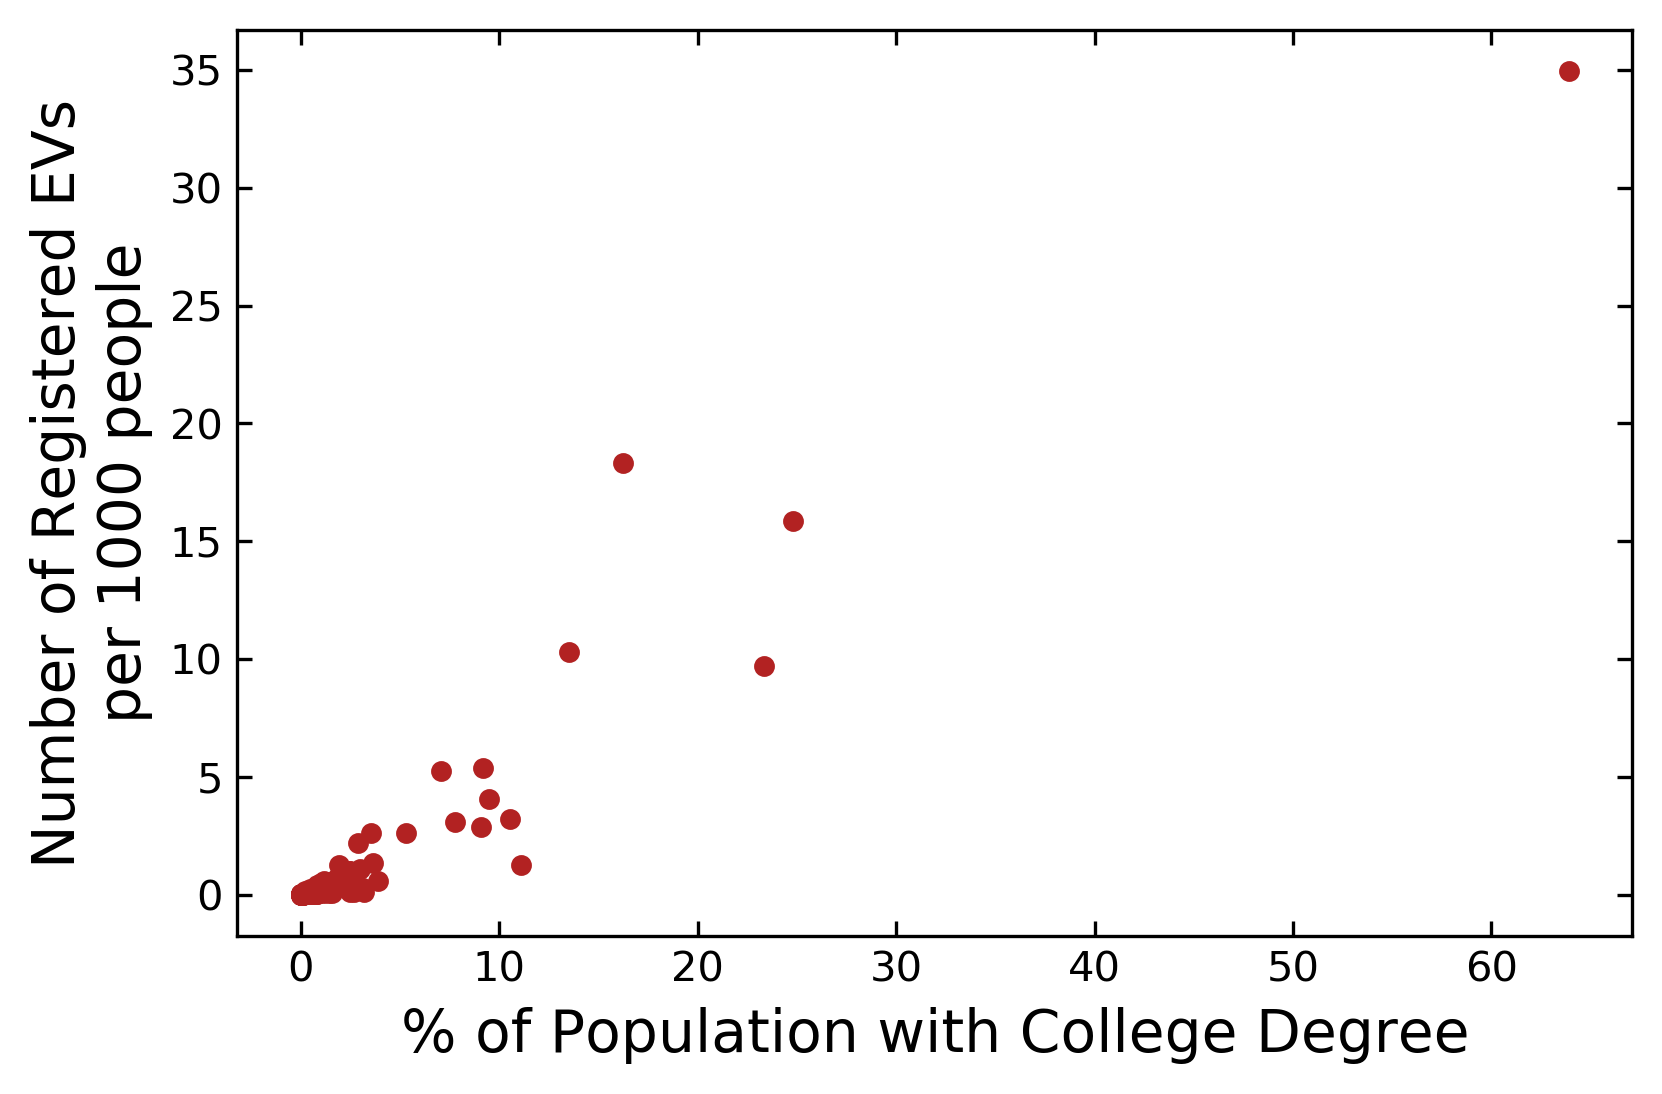

In [556]:
fig, ax = plt.subplots(figsize=(6,4), dpi=300)
ax.scatter(pops, vehicles, color='firebrick', s=16)

# ax.set_title('Relationship Between Educational Attainment\nand EV Adoption', fontsize=16)
ax.set_xlabel('% of Population with College Degree', fontsize=14)
ax.set_ylabel('Number of Registered EVs\nper 1000 people', fontsize=14)
ax.tick_params(axis='both', direction='in', left=True, right=True, top=True, bottom=True)
# ax.set_xlim(-1,1)
# ax.set_ylim(-1,1)

In [557]:
fig.savefig('proposalfig.png', bbox_inches='tight')

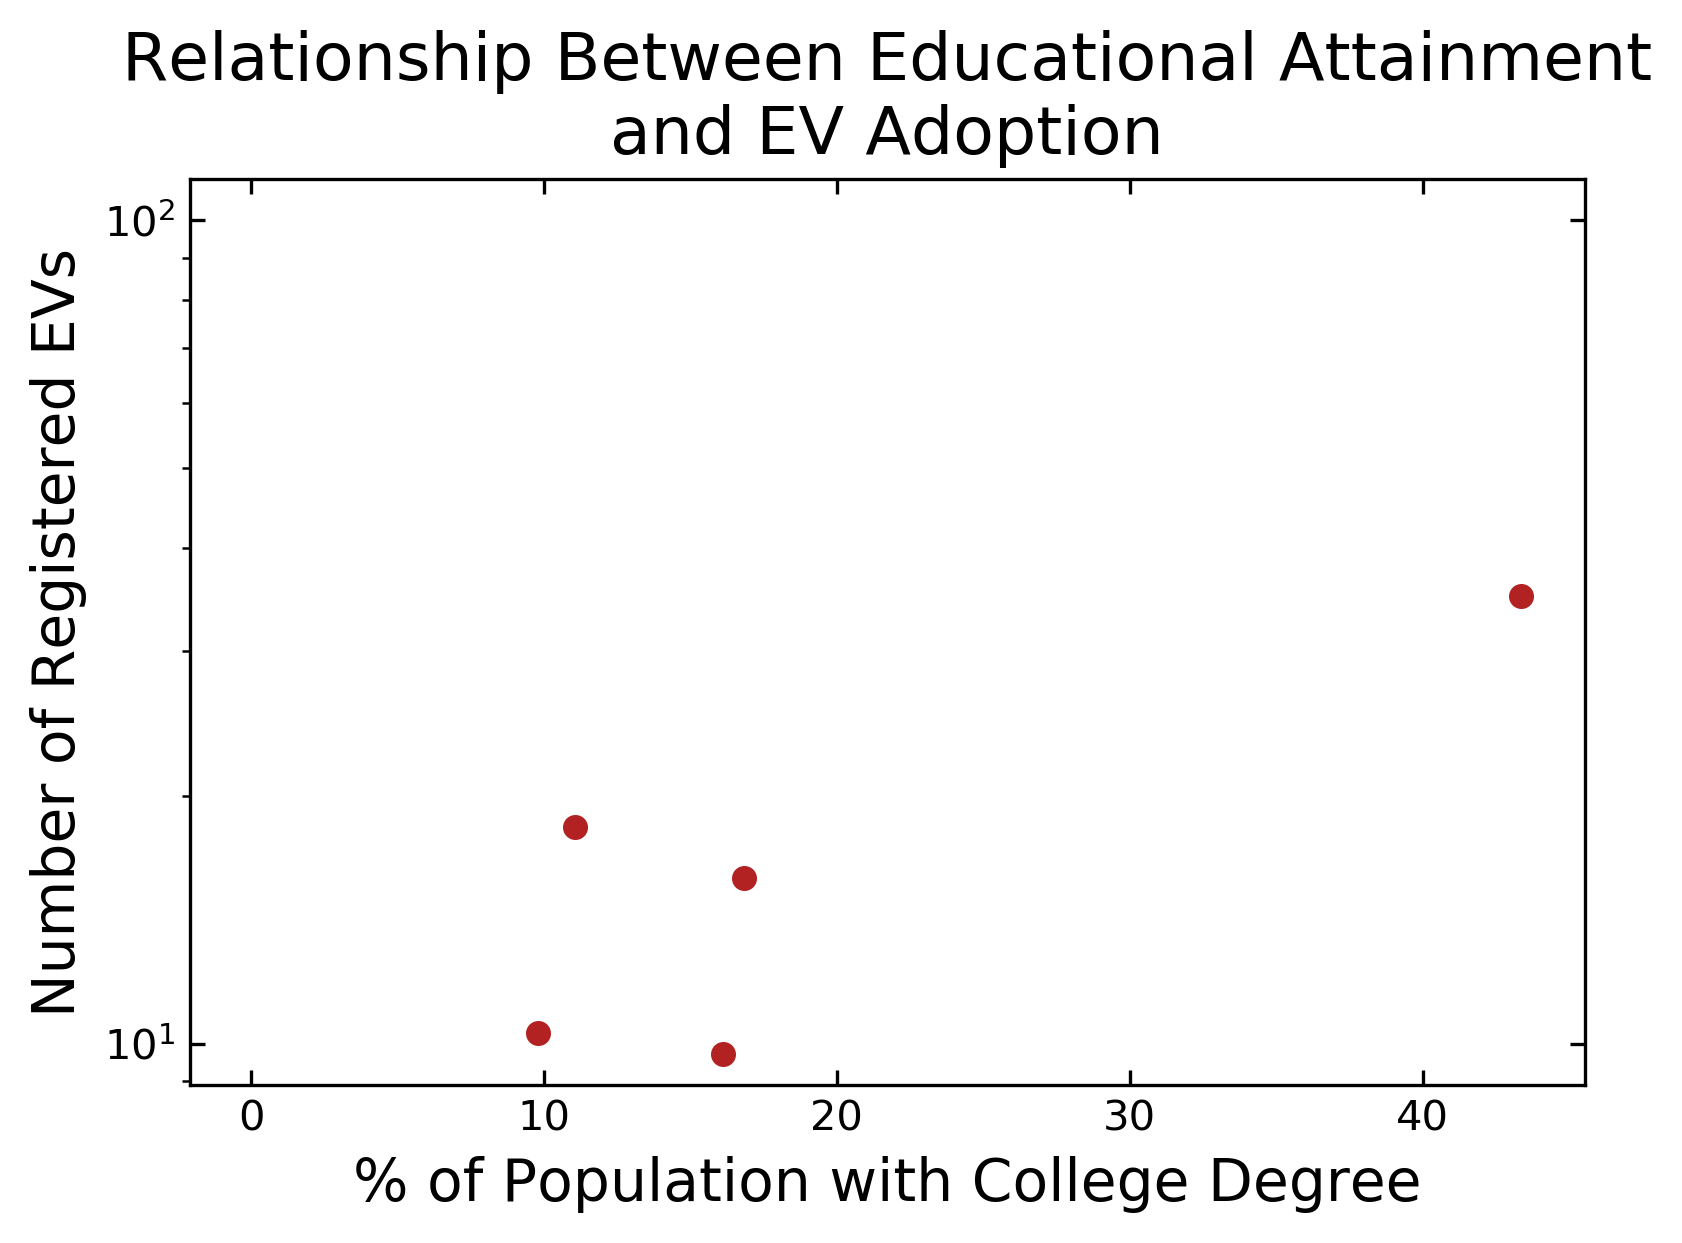

In [435]:
fig, ax = plt.subplots(figsize=(6,4), dpi=300)
ax.scatter(pops + np.random.rand(len(pops)), vehicles, color='firebrick', s=25)
ax.set_yscale('log')
ax.set_title('Relationship Between Educational Attainment\nand EV Adoption', fontsize=16)
ax.set_xlabel('% of Population with College Degree', fontsize=14)
ax.set_ylabel('Number of Registered EVs', fontsize=14)
ax.tick_params(axis='both', direction='in', left=True, right=True, top=True, bottom=True)